Sources
-(Off Stats): https://www.pro-football-reference.com/years/2021/index.htm#all_team_stats
-https://www.statmuse.com/nfl/ask/nfl-2012-rookie-qb-stats


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
#this is the dataset of all rookie qbs in the past 10 seasons
rookie_df = pd.read_csv('Rookie_QB_Dataset.csv')
rookie_df

,NAME,SEASON,TM,GP,CMP,ATT,PCT,YDS,AVG,YDS/G,TD,TD%,INT,INT%,SCK,SCKY,RATE
0,Bryce Perkins,2022,LAR,5,19,34,55.9,161,4.7,32.2,1,2.9,2,5.9,6,50,53.7
1,Kyle Trask,2022,TB,1,3,9,33.3,23,2.6,23.0,0,0.0,0,0.0,0,0,42.4
2,Sam Howell,2022,WAS,1,11,19,57.9,169,8.9,169.0,1,5.3,1,5.3,3,11,83.0
3,Skylar Thompson,2022,MIA,7,60,105,57.1,534,5.1,76.3,1,1.0,3,2.9,6,40,62.2
4,Bailey Zappe,2022,NE,4,65,92,70.7,781,8.5,195.3,5,5.4,3,3.3,6,40,100.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Greg McElroy,2012,NYJ,2,19,31,61.3,214,6.9,107.0,1,3.2,1,3.2,11,71,79.2
136,Brock Osweiler,2012,DEN,5,2,4,50.0,12,3.0,2.4,0,0.0,0,0.0,0,0,56.3
137,Ryan Tannehill,2012,MIA,16,282,484,58.3,"3,294",6.8,205.9,12,2.5,13,2.7,35,234,76.1
138,Brandon Weeden,2012,CLE,15,297,517,57.4,"3,385",6.5,225.7,14,2.7,17,3.3,28,186,72.6


In [4]:
#this is the dataset of each NFL team's offense in 2021
twentyone_off_df = pd.read_csv('2021_Offensive Stats.csv')
new_header = twentyone_off_df.iloc[0] #grab the first row for the header
twentyone_off_df = twentyone_off_df[1:] #take the data less the header row
twentyone_off_df.columns = new_header 
twentyone_off_df = twentyone_off_df.iloc[:-3]
twentyone_off_df = twentyone_off_df.drop(['Rk', 'G'], axis=1)

cols = []
count = 1
for column in twentyone_off_df.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentyone_off_df.columns = cols
twentyone_off_df = twentyone_off_df.rename({'Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
twentyone_off_df

,Tm,PF,Ttl_Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,...,Rush_Yds,TD,Y/A,1stD,Pen,Pen_Yds,1stPy,Sc%,TO%,EXP
1,Dallas Cowboys,530,6919,1153,6,20,9,390,444,647,...,2119,15,4.5,111,127,1103,31,43.8,9.9,158.06
2,Tampa Bay Buccaneers,511,6901,1139,6.1,19,7,404,492,731,...,1672,18,4.3,106,97,874,25,44.3,9.8,216.14
3,Buffalo Bills,483,6493,1143,5.7,22,6,398,415,655,...,2209,20,4.8,134,113,980,28,45.2,11.3,216.68
4,Kansas City Chiefs,480,6746,1134,5.9,25,12,419,448,675,...,1955,16,4.5,119,111,925,33,48.2,13.7,261.77
5,Los Angeles Chargers,474,6634,1128,5.9,22,7,401,443,674,...,1834,18,4.3,112,116,1033,33,45.7,12,164.91
6,New England Patriots,462,6008,1052,5.7,23,10,362,364,535,...,2151,24,4.4,139,95,854,36,48,12.6,126.97
7,Cincinnati Bengals,460,6145,1046,5.9,21,7,337,384,555,...,1742,16,4,96,72,620,33,42.6,10,118.5
8,Los Angeles Rams,460,6325,1058,6,23,5,355,406,607,...,1683,10,4,99,76,637,23,45.9,12.2,161.53
9,Indianapolis Colts,451,5901,1052,5.6,19,11,354,324,521,...,2540,22,5.1,154,76,688,33,43.3,8.9,127.06
10,Green Bay Packers,450,6215,1072,5.8,13,6,375,402,593,...,1900,13,4.3,109,69,678,31,44.5,6.4,180.42


array([0.40935832, 0.26390012])

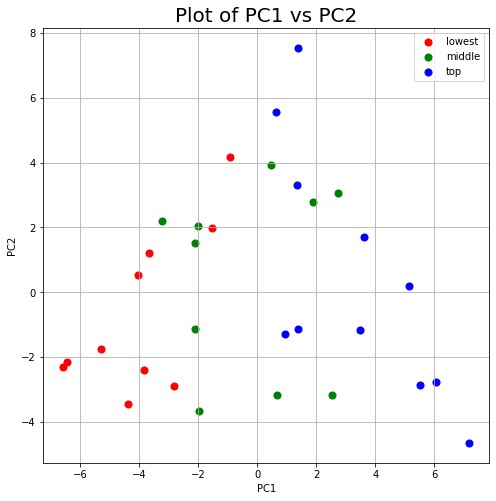

In [5]:
#Since we cant visualize all of these in one plot,too many dimesnsions, we use PCA for visualization
#use PCA to make dataset smaller
#represent data in best way
features = ['PF', 'Ttl_Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att', 'Pass_Yds',
       'TD', 'Int', 'NY/A', '1stD', 'Att', 'Rush_Yds', 'TD', 'Y/A', '1stD', 'Pen',
       'Pen_Yds', '1stPy', 'Sc%', 'TO%']
x = twentyone_off_df.loc[:, features].values
y = twentyone_off_df.loc[:, ['EXP']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
EXPDataframe = twentyone_off_df[['EXP']]
newDataframe = pd.concat([principalDataframe, EXPDataframe],axis = 1)
newDataframe = newDataframe.dropna()
newDataframe['EXP']= newDataframe['EXP'].astype('float')
newDataframe["quantile"] = pd.qcut(newDataframe["EXP"], q=[0, 0.33, 0.66, 1],
                         labels=["lowest", "middle", "top"])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Plot of PC1 vs PC2', fontsize = 20)
targets = ['lowest', 'middle', 'top']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['quantile'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

pca.explained_variance_ratio_

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newDataframe['PC1'].to_numpy().reshape(-1,1), newDataframe['EXP'], test_size=0.2, random_state=42) #20% of PC1 for training 80% is data I already had for PC1 and 20% is testing
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)
#80% for training data is good



array([-21.4517823 , 142.7311596 ,  25.35912958,  -1.66562235,
       160.92602117, 163.98830038, -79.95754275])

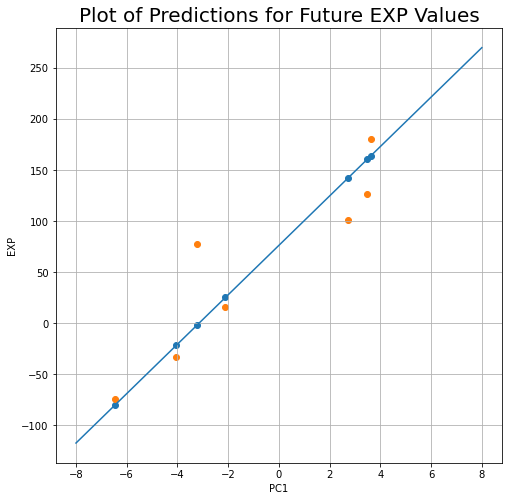

In [20]:
#this is a graph of linear regression used to predict future teams EXP based on current offensive data 
fig = plt.figure(figsize = (8,8)) #need this to allow you to run both
ax = fig.add_subplot(1,1,1) 
reg.coef_, reg.intercept_
x_reg = np.linspace(-8,8,50)
plt.plot(x_reg, reg.coef_[0]*x_reg + reg.intercept_)
plt.scatter(X_test, reg.predict(X_test))
plt.scatter(X_test, y_test)
ax.set_xlabel('PC1')
ax.set_ylabel('EXP')
ax.set_title('Plot of Predictions for Future EXP Values', fontsize = 20)
ax.grid()

#light blue is the ones that we predicted based on the model
#orange is the exact true values, so we did not predict totally correctly
#predicting a teams EXP based on prin componet
#what features correspond to what princ componets

#this uses current offensive data to predict future teams EXP

In [7]:
comp_df = pd.DataFrame(pca.components_, columns = twentyone_off_df.loc[:, features].columns, index = ['PC1','PC2'])
comp_df=comp_df.T
largest_values = comp_df.nlargest(20, 'PC1')
largest_values 
#we can see that the values that have the highest correlation with a positive offense production are (Ttl_Yds, PF, 1stD, Sc%
#Y/P)
#this is the value of the first YDS which is total y


,PC1,PC2
Ttl_Yds,0.262833,0.005459
PF,0.251160,0.032701
1stD,0.251059,0.017978
1stD,0.251059,0.017978
1stD,0.251059,0.017978
Sc%,0.244339,0.040715
Y/P,0.227367,0.020737
Pass_Yds,0.226255,-0.160680
1stD,0.218524,-0.181535
1stD,0.218524,-0.181535


In [8]:
#Get just the columns that I need or see as important
#'Ttl_Yds', 'PF', '1stD', 'Sc%', 'Y/P'
cols = []
count = 1
for column in twentyone_off_df.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentyone_off_df.columns = cols
twentyone_off_DF = twentyone_off_df.rename({'Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
columns_to_keep = ['Ttl_Yds', 'PF', '1stD', 'Sc%', 'Y/P']
twentyone_off_DF = twentyone_off_DF[columns_to_keep]
twentyone_off_DF

,Ttl_Yds,PF,1stD,1stD,1stD,Sc%,Y/P
1,6919,530,390,248,111,43.8,6
2,6901,511,404,273,106,44.3,6.1
3,6493,483,398,236,134,45.2,5.7
4,6746,480,419,267,119,48.2,5.9
5,6634,474,401,256,112,45.7,5.9
6,6008,462,362,187,139,48,5.7
7,6145,460,337,208,96,42.6,5.9
8,6325,460,355,233,99,45.9,6
9,5901,451,354,167,154,43.3,5.6
10,6215,450,375,235,109,44.5,5.8


In [9]:
#get the data back with the teams
twentyone_off = pd.read_csv('2021_Offensive Stats.csv')
new_header = twentyone_off.iloc[0] #grab the first row for the header
twentyone_off = twentyone_off[1:] #take the data less the header row
twentyone_off.columns = new_header 
twentyone_off = twentyone_off.iloc[:-3]
twentyone_off = twentyone_off.drop(['G'], axis=1)

cols = []
count = 1
for column in twentyone_off.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentyone_off.columns = cols
twentyone_off = twentyone_off.rename({'Tm' : 'TM','Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
columns_to_keep = ['TM','Ttl_Yds', 'PF', '1stD', 'Sc%', 'Y/P']
twentyone_off = twentyone_off[columns_to_keep]
#twentyone_off


    

In [14]:
twentyone_off['Ttl_Yds'] = twentyone_off['Ttl_Yds'].astype("float")
twentyone_off['PF'] = twentyone_off['PF'].astype("float")
twentyone_off['Sc%'] = twentyone_off['Sc%'].astype("float")
twentyone_off['Y/P'] = twentyone_off['Y/P'].astype("float")
twentyone_off
twentyone_off['sum'] = twentyone_off['Ttl_Yds']+twentyone_off['PF']+twentyone_off['Sc%']+twentyone_off['Y/P']
twentyone_off['Rank'] = twentyone_off['sum'].rank(ascending=False)
twentyone_off = twentyone_off.sort_values(by='sum', ascending=False)
twentyone_off.T
#https://www.youtube.com/watch?v=FgakZw6K1QQ
#https://www.youtube.com/watch?v=HMOI_lkzW08



,1,2,4,5,3,17,13,11,8,10,...,21,22,19,27,28,26,32,29,31,30
TM,Dallas Cowboys,Tampa Bay Buccaneers,Kansas City Chiefs,Los Angeles Chargers,Buffalo Bills,Baltimore Ravens,San Francisco 49ers,Arizona Cardinals,Los Angeles Rams,Green Bay Packers,...,Pittsburgh Steelers,Miami Dolphins,New Orleans Saints,Chicago Bears,New York Jets,Atlanta Falcons,Jacksonville Jaguars,Carolina Panthers,New York Giants,Houston Texans
Ttl_Yds,6919.0,6901.0,6746.0,6634.0,6493.0,6440.0,6387.0,6352.0,6325.0,6215.0,...,5361.0,5219.0,5177.0,5225.0,5208.0,5164.0,5191.0,5081.0,4884.0,4727.0
PF,530.0,511.0,480.0,474.0,483.0,387.0,427.0,449.0,460.0,450.0,...,343.0,341.0,364.0,311.0,310.0,313.0,253.0,304.0,258.0,280.0
1stD,390,404,419,401,398,394,361,367,355,375,...,323,325,307,333,310,306,304,322,299,266
1stD,248,273,267,256,236,209,200,214,233,235,...,204,206,165,180,195,196,178,174,171,162
1stD,111,106,119,112,134,159,130,127,99,109,...,85,87,113,119,87,75,92,118,90,77
Sc%,43.8,44.3,48.2,45.7,45.2,38.5,41.2,44.7,45.9,44.5,...,34.7,30.1,33.7,31.5,29.4,32.8,26.4,29.2,27.5,26.6
Y/P,6.0,6.1,5.9,5.9,5.7,5.4,6.1,5.6,6.0,5.8,...,4.8,4.8,4.9,4.9,5.0,5.1,5.0,4.6,4.7,4.7
sum,7498.8,7462.4,7280.1,7159.6,7026.9,6870.9,6861.3,6851.3,6836.9,6715.3,...,5743.5,5594.9,5579.6,5572.4,5552.4,5514.9,5475.4,5418.8,5174.2,5038.3
Rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0


In [15]:
mask = rookie_df['SEASON']== 2022 
ttwo_avg_QBs = rookie_df[mask] 
ttwo_avg_QBs = ttwo_avg_QBs.sort_values(by='RATE', ascending=False)
nfl_teams ={
    "ARI": "Arizona Cardinals",
    "ATL": "Atlanta Falcons",
    "BAL": "Baltimore Ravens",
    "BUF": "Buffalo Bills",
    "CAR": "Carolina Panthers",
    "CHI": "Chicago Bears",
    "CIN": "Cincinnati Bengals",
    "CLE": "Cleveland Browns",
    "DAL": "Dallas Cowboys",
    "DEN": "Denver Broncos",
    "DET": "Detroit Lions",
    "GB": "Green Bay Packers",
    "HOU": "Houston Texans",
    "IND": "Indianapolis Colts",
    "JAX": "Jacksonville Jaguars",
    "KC": "Kansas City Chiefs",
    "LAC": "Los Angeles Chargers",
    "LAR": "Los Angeles Rams",
    "LV": "Las Vegas Raiders",
    "MIA": "Miami Dolphins",
    "MIN": "Minnesota Vikings",
    "NE": "New England Patriots",
    "NO": "New Orleans Saints",
    "NYG": "New York Giants",
    "NYJ": "New York Jets",
    "PHI": "Philadelphia Eagles",
    "PIT": "Pittsburgh Steelers",
    "SEA": "Seattle Seahawks",
    "SF": "San Francisco 49ers",
    "TB": "Tampa Bay Buccaneers",
    "TEN": "Tennessee Titans",
    "WAS": "Washington Football Team"
}
def replace_nfl_abbreviations(ttwo_avg_QBs, Column):
    ttwo_avg_QBs_copy = ttwo_avg_QBs.copy()
    ttwo_avg_QBs_copy[Column] = ttwo_avg_QBs_copy[Column].replace(nfl_teams)
    return ttwo_avg_QBs_copy

ttwo_avg_QBs_replaced = replace_nfl_abbreviations(ttwo_avg_QBs, "TM")
ttwo_avg_QBs_replaced

#compare the ranking position of one team to the one on the other by subtracting the positions
#make a plot of the rankings of the rookie qbs rating and then look at the margin of seperation between them and the off
#rankings when they are plotted

#combine the values for each team into one data frame with the ranking and the qb rate and see how well they correlate

#

,NAME,SEASON,TM,GP,CMP,ATT,PCT,YDS,AVG,YDS/G,TD,TD%,INT,INT%,SCK,SCKY,RATE
9,Brock Purdy,2022,San Francisco 49ers,9,114,170,67.1,"1,374",8.1,152.7,13,7.6,4,2.4,11,84,107.3
4,Bailey Zappe,2022,New England Patriots,4,65,92,70.7,781,8.5,195.3,5,5.4,3,3.3,6,40,100.9
7,Desmond Ridder,2022,Atlanta Falcons,4,73,115,63.5,708,6.2,177.0,2,1.7,0,0.0,9,33,86.4
2,Sam Howell,2022,Washington Football Team,1,11,19,57.9,169,8.9,169.0,1,5.3,1,5.3,3,11,83.0
5,Kenny Pickett,2022,Pittsburgh Steelers,13,245,389,63.0,"2,404",6.2,184.9,7,1.8,9,2.3,27,182,76.7
3,Skylar Thompson,2022,Miami Dolphins,7,60,105,57.1,534,5.1,76.3,1,1.0,3,2.9,6,40,62.2
0,Bryce Perkins,2022,Los Angeles Rams,5,19,34,55.9,161,4.7,32.2,1,2.9,2,5.9,6,50,53.7
8,Anthony Brown,2022,Baltimore Ravens,2,22,49,44.9,302,6.2,151.0,0,0.0,2,4.1,5,14,48.2
6,Malik Willis,2022,Tennessee Titans,8,31,61,50.8,276,4.5,34.5,0,0.0,3,4.9,10,49,42.8
1,Kyle Trask,2022,Tampa Bay Buccaneers,1,3,9,33.3,23,2.6,23.0,0,0.0,0,0.0,0,0,42.4


In [16]:
from sklearn.preprocessing import StandardScaler
merged_df = pd.merge(twentyone_off,ttwo_avg_QBs_replaced , on='TM')
columns_to_keep = ['RATE','sum']
merged_df = merged_df[columns_to_keep]
merged_df = merged_df.dropna()
merged_df



,RATE,sum
0,42.4,7462.4
1,48.2,6870.9
2,107.3,6861.3
3,53.7,6836.9
4,100.9,6523.7
5,42.8,6285.0
6,83.0,5876.7
7,76.7,5743.5
8,62.2,5594.9
9,86.4,5514.9


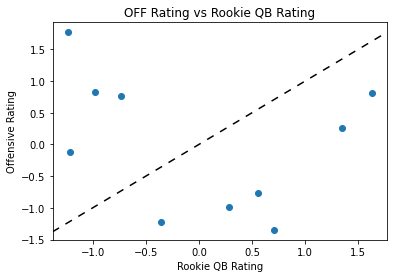

In [21]:
scaler = StandardScaler()
scale_model = scaler.fit(merged_df)
scaled_data = scale_model.transform(merged_df)
xx = np.linspace(-3, 3) #creating values between those points, x array of values
yy = .055666781 *xx - 1.1797
x = scaled_data[:,0] #RATE
y = scaled_data[:,1] #sum
plt.scatter(x, y)
plt.xlabel('Rookie QB Rating')
plt.ylabel('Offensive Rating')
plt.title("OFF Rating vs Rookie QB Rating")
plt.axline((-1, -1), slope=1, color="black", linestyle=(0, (5, 5)))
#since we can tell there is a line 

The points plotted to the right of the line show those rookie QBs with high rankings were on teams with low offensive rankings the year before. The points plotted to the left of the line represent the teams with higher offensive ratings the year before but lower preformance ratings out of their rookie QBs that they have drafted. 
This shows a negative correlation between previous year offensive rankings and how rookie QBs preform on those teams.

In [18]:
mock = pd.read_csv('Mock_Draft_2023.csv')
mock_df = mock.rename({'Team': 'Tm'}, axis = 'columns')
twentytwo_off_df = pd.read_csv('2023_Offense_Stats.csv')
new_header = twentytwo_off_df.iloc[0] #grab the first row for the header
twentytwo_off_df = twentytwo_off_df[1:] #take the data less the header row
twentytwo_off_df.columns = new_header 
twentytwo_off_df = twentytwo_off_df.iloc[:-3]
twentytwo_off_df = twentytwo_off_df.drop(['Rk', 'G'], axis=1)
#twentytwo_off_df = twentytwo_off_df.astype(float)
cols = []
count = 1
for column in twentytwo_off_df.columns:
    if column == 'Yds':
        cols.append(f'Yds_{count}')
        count+=1
        continue
    cols.append(column)
twentytwo_off_df.columns = cols
twentytwo_off_DF = twentytwo_off_df.rename({'Yds_1': 'Ttl_Yds', 'Yds_2': 'Pass_Yds', 'Yds_3': 'Rush_Yds', 'Yds_4': 'Pen_Yds'}, axis='columns')
columns_to_keep = ['Tm','Ttl_Yds','PF','Sc%','Y/P']
twentytwo_off_DF = twentytwo_off_DF[columns_to_keep]
twentytwo_off_DF

twentytwo_off_DF['Ttl_Yds'] = twentytwo_off_DF['Ttl_Yds'].astype("float")
twentytwo_off_DF['PF'] = twentytwo_off_DF['PF'].astype("float")
twentytwo_off_DF['Sc%'] = twentytwo_off_DF['Sc%'].astype("float")
twentytwo_off_DF['Y/P'] = twentytwo_off_DF['Y/P'].astype("float")
twentytwo_off_DF['sum'] = twentytwo_off_DF['Ttl_Yds']+twentytwo_off_DF['PF']+twentytwo_off_DF['Sc%']+twentytwo_off_DF['Y/P']
twentytwo_off_DF['Rank'] = twentytwo_off_DF['sum'].rank(ascending=False)
twentytwo_off_DF = twentytwo_off_DF.sort_values(by='sum', ascending=False)
twentytwo_off_DF

nfl_teams = ["Arizona Cardinals", "Atlanta Falcons", "Baltimore Ravens", "Buffalo Bills", "Carolina Panthers",
             "Chicago Bears", "Cincinnati Bengals", "Cleveland Browns", "Dallas Cowboys", "Denver Broncos",
             "Detroit Lions", "Green Bay Packers", "Houston Texans", "Indianapolis Colts", "Jacksonville Jaguars",
             "Kansas City Chiefs", "Las Vegas Raiders", "Los Angeles Chargers", "Los Angeles Rams", "Miami Dolphins",
             "Minnesota Vikings", "New England Patriots", "New Orleans Saints", "New York Giants", "New York Jets",
             "Philadelphia Eagles", "Pittsburgh Steelers", "San Francisco 49ers", "Seattle Seahawks",
             "Tampa Bay Buccaneers", "Tennessee Titans", "Washington Football Team"]

twentytwo_off_DF


,Tm,Ttl_Yds,PF,Sc%,Y/P,sum,Rank
1,Kansas City Chiefs,7032.0,496.0,46.4,6.4,7580.8,1.0
2,Philadelphia Eagles,6614.0,477.0,42.5,5.9,7139.4,2.0
5,Detroit Lions,6460.0,453.0,43.2,5.9,6962.1,3.0
4,Buffalo Bills,6361.0,455.0,45.0,6.1,6867.1,4.0
6,San Francisco 49ers,6216.0,450.0,41.4,5.9,6713.3,5.0
11,Miami Dolphins,6197.0,397.0,38.8,6.1,6638.9,6.0
7,Minnesota Vikings,6145.0,424.0,36.0,5.5,6610.5,7.0
3,Dallas Cowboys,6034.0,467.0,41.5,5.4,6547.9,8.0
13,Los Angeles Chargers,6108.0,391.0,38.1,5.3,6542.4,9.0
10,Jacksonville Jaguars,6075.0,404.0,39.2,5.7,6523.9,10.0


In [19]:
from sklearn.preprocessing import StandardScaler
merged_df_mock = pd.merge(twentytwo_off_DF,mock_df , on='Tm')
columns_to_keep = ['Tm','sum','Player']
merged_df_mock = merged_df_mock[columns_to_keep]
merged_df_mock = merged_df_mock.dropna()
merged_df_mock


,Tm,sum,Player
0,Tampa Bay Buccaneers,6244.1,Will Levis
1,Indianapolis Colts,5621.0,Anthony Richardson
2,Carolina Panthers,5593.6,CJ Stroud
3,Houston Texans,5142.5,Bryce Young
